In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')
import plotly.graph_objs as go
from plotly.offline import iplot

# Cheak the state of the Data

In [2]:
df=pd.read_csv('../input/urinary-biomarkers-for-pancreatic-cancer/Debernardi et al 2020 data.csv')

In [3]:
df.head(10)

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN
5,S103,Cohort2,BPTB,53,M,1,NaN,NaN,NaN,0.84825,0.003393,62.12600,59.793000,NaN
6,S104,Cohort2,BPTB,70,M,1,NaN,NaN,NaN,0.62205,0.174381,152.27700,117.516000,NaN
7,S105,Cohort2,BPTB,58,F,1,NaN,NaN,11.0,0.89349,0.003574,3.73000,40.294000,NaN
8,S106,Cohort2,BPTB,59,F,1,NaN,NaN,NaN,0.48633,0.001945,7.02100,26.782000,NaN
9,S107,Cohort2,BPTB,56,F,1,NaN,NaN,24.0,0.61074,0.278778,83.92800,19.185000,NaN


In [4]:
df.shape

(590, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

In [6]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [7]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['stage', 'benign_sample_diagnosis', 'plasma_CA19_9', 'REG1A']

In [8]:
#% of missing values
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

stage has 66.2712 % missing values
benign_sample_diagnosis has 64.7458 % missing values
plasma_CA19_9 has 40.678 % missing values
REG1A has 48.1356 % missing values


In [9]:
del(df['stage'])
del(df['benign_sample_diagnosis'])
del(df['sample_id'])

In [10]:
 
df['plasma_CA19_9'].fillna(int(df['plasma_CA19_9'].mean()), inplace=True)

In [11]:
 
df['REG1A'].fillna(int(df['REG1A'].mean()), inplace=True)

In [12]:
df.isna().sum()

patient_cohort    0
sample_origin     0
age               0
sex               0
diagnosis         0
plasma_CA19_9     0
creatinine        0
LYVE1             0
REG1B             0
TFF1              0
REG1A             0
dtype: int64

In [13]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

[]

### Now the data clean and we have not any missing value

# EDA for the data

In [14]:
len(df['diagnosis'].unique())

3

In [15]:
df['age'].unique()

array([33, 81, 51, 61, 62, 53, 70, 58, 59, 56, 77, 71, 49, 60, 69, 55, 28,
       54, 50, 40, 74, 63, 47, 45, 35, 30, 48, 44, 41, 89, 87, 66, 36, 67,
       73, 83, 65, 64, 26, 34, 57, 46, 38, 84, 68, 37, 52, 78, 43, 76, 72,
       32, 39, 29, 82, 31, 75, 79, 42, 80, 88, 86, 85])

In [16]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

In [17]:
df.groupby('age')['diagnosis'].mean()

age
26    1.500000
28    1.333333
29    2.200000
30    1.250000
31    2.000000
        ...   
85    3.000000
86    3.000000
87    1.666667
88    3.000000
89    1.000000
Name: diagnosis, Length: 63, dtype: float64

<AxesSubplot:xlabel='age'>

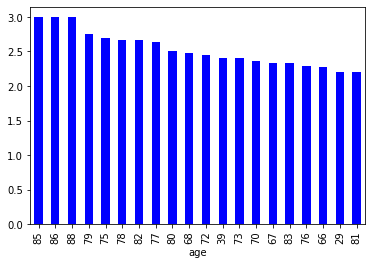

In [18]:
df.groupby('age')['diagnosis'].mean().nlargest(20).plot.bar(color='blue')

In [19]:
df.groupby('sex')['diagnosis'].mean()

sex
F    1.892977
M    2.164948
Name: diagnosis, dtype: float64

<AxesSubplot:xlabel='sex'>

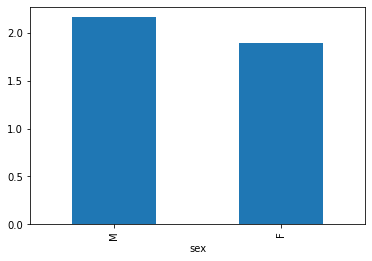

In [20]:
df.groupby('sex')['diagnosis'].mean().nlargest(20).plot.bar()

<AxesSubplot:xlabel='diagnosis', ylabel='Density'>

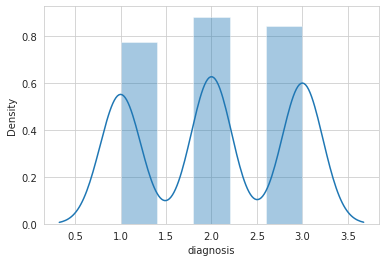

In [21]:
# Calc the diagnosis distribution
sns.set_style(style='whitegrid')
sns.distplot(df['diagnosis'])

<AxesSubplot:xlabel='age', ylabel='Density'>

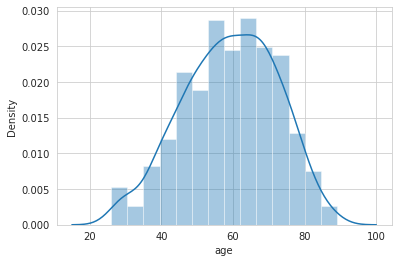

In [22]:
# Calc the age distribution
sns.set_style(style='whitegrid')
sns.distplot(df['age'])

Text(0.5, 0, 'Number of outlets')

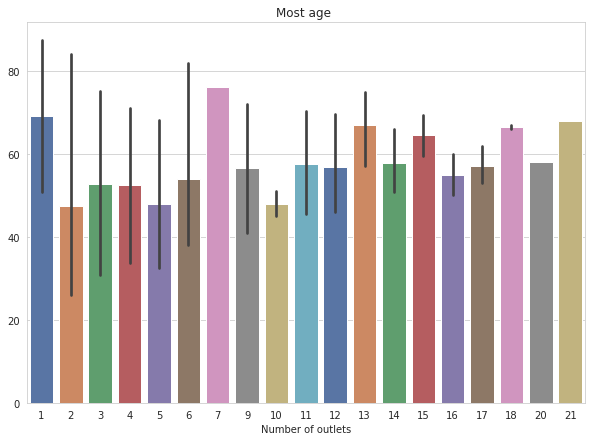

In [23]:
plt.figure(figsize=(10,7))
chains=df['age'].value_counts()[0:100]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most age ")
plt.xlabel("Number of outlets")

In [24]:
x=df['sex'].value_counts()
labels=['Male','Female']

<AxesSubplot:xlabel='age'>

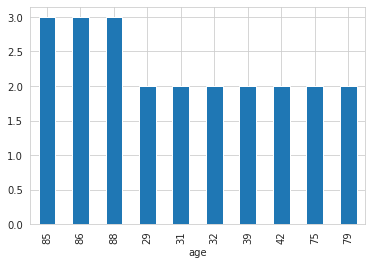

In [25]:
# Calculate the min by group age and diagnosis
df.groupby('age')['diagnosis'].min().nlargest(10).plot.bar()

<AxesSubplot:>

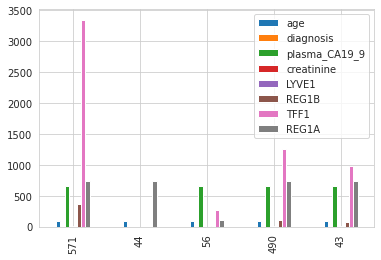

In [26]:
df.sort_values(by='age').tail(5).plot.bar()

In [27]:
px.scatter(df, x="age", y="sex", color="diagnosis", marginal_y="violin", marginal_x="box")

In [28]:
px.histogram(df, x="age", y="diagnosis", color="sex")

# Pr-Processing for data

In [29]:
df['sex'].value_counts()

F    299
M    291
Name: sex, dtype: int64

In [30]:
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['sex'] = pd.to_numeric(df['sex'], errors='coerce')

In [31]:
df['sex'].value_counts()

0    299
1    291
Name: sex, dtype: int64

In [32]:
df['patient_cohort'] = df['patient_cohort'].map({'Cohort1': 1, 'Cohort2': 0})
df['patient_cohort'] = pd.to_numeric(df['patient_cohort'], errors='coerce')

In [33]:
df['patient_cohort'].value_counts()

1    332
0    258
Name: patient_cohort, dtype: int64

In [34]:
df['sample_origin'] = df['sample_origin'].map({'BPTB': 0, 'LIV': 1,'ESP': 2,'UCL': 3})
df['sample_origin'] = pd.to_numeric(df['sample_origin'], errors='coerce')

In [35]:
df["sample_origin"].value_counts()

0    409
1    132
2     29
3     20
Name: sample_origin, dtype: int64

In [36]:
target='diagnosis'

In [37]:
x = df.drop(target, axis=1)
y = df[target]

In [38]:
#Spliting dataset into training set and testing test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Using DecisionTreeRegressor

In [40]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier()
regressor.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
print('Ridge Regression Train Score is : ' , regressor.score(X_train, y_train))
print('Ridge Regression Test Score is : ' , regressor.score(X_test, y_test))

Ridge Regression Train Score is :  1.0
Ridge Regression Test Score is :  0.5692307692307692


In [42]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

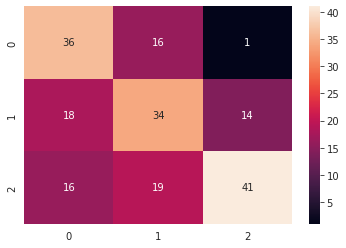

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

In [45]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.6666666666666666
Specificity :  0.68


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5692307692307692

# Using XGB

In [47]:
from xgboost import XGBClassifier
regressor = XGBClassifier()
regressor.fit(X_train, y_train)

[09:55:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [48]:
print('XGB Regression Train Score is : ' , regressor.score(X_train, y_train))
print('XGB Regression Test Score is : ' , regressor.score(X_test, y_test))

XGB Regression Train Score is :  1.0
XGB Regression Test Score is :  0.7076923076923077


In [49]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [50]:

total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.6666666666666666
Specificity :  0.68


In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7076923076923077

# Using LGBM

In [52]:
import lightgbm as ltb
regressor = ltb.LGBMClassifier()
regressor.fit(X_train, y_train)

LGBMClassifier()

In [53]:
print('LGBM Train Score is : ' , regressor.score(X_train, y_train))
print('LGBM Test Score is : ' , regressor.score(X_test, y_test))

LGBM Train Score is :  1.0
LGBM Test Score is :  0.7128205128205128


In [54]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [55]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.6666666666666666
Specificity :  0.68


In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7128205128205128

# RandomForest

In [57]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier()
regressor.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
print('RF Train Score is : ' , regressor.score(X_train, y_train))
print('RF Test Score is : ' , regressor.score(X_test, y_test))

RF Train Score is :  1.0
RF Test Score is :  0.7230769230769231


In [59]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [60]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.6666666666666666
Specificity :  0.68


In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7230769230769231